<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/MR2Trees_Forests_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **📌 Import Necessary Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# 📄**Credit Score Data Set**

# 📌 **Load and Prepare the Dataset**

In [4]:
# Define the URL of the dataset hosted on GitHub
url = "https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/Credit_ISLR.csv"

# Load the dataset into a Pandas DataFrame
credit_df = pd.read_csv(url)

# Display information about the dataset
print("Dataset Information:")
credit_df.info()  # Shows column names, data types, and missing values


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   ID          400 non-null    int64  
 2   Income      400 non-null    float64
 3   Limit       400 non-null    int64  
 4   Rating      400 non-null    int64  
 5   Cards       400 non-null    int64  
 6   Age         400 non-null    int64  
 7   Education   400 non-null    int64  
 8   Gender      400 non-null    object 
 9   Student     400 non-null    object 
 10  Married     400 non-null    object 
 11  Ethnicity   400 non-null    object 
 12  Balance     400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


### The Credit dataset

The **outcome** variable is the **Balance** column.

# 📌 **Remove Unnecessary Columns**

In [5]:
# Remove two unnecessary columns

credit_df.drop(['Unnamed: 0', 'ID'], axis= 1, inplace= True)

## 👉 **Why do we do this?**
- Eliminates **irrelevant** columns that don’t add value.
- Reduces **memory usage** and improves processing speed.
- Ensures the dataset remains **focused on useful features**.

## ✅ **Real-Life Example**
- Think of **organizing your workspace** by removing unnecessary clutter.
- A **clean desk** helps you work more efficiently, just like a **clean dataset** helps models perform better.

---


There are four qualitative predictors. We need to convert them into numeric ones. Let's use dummy coding.

# 📌 **Convert Categorical Variables into Dummy Variables**

In [6]:
# Convert categorical columns into numerical format using one-hot encoding
credit_df_dummies = pd.get_dummies(credit_df, columns=['Gender', 'Student', 'Married', 'Ethnicity'], drop_first=True)

# Display updated dataset info
credit_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               400 non-null    float64
 1   Limit                400 non-null    int64  
 2   Rating               400 non-null    int64  
 3   Cards                400 non-null    int64  
 4   Age                  400 non-null    int64  
 5   Education            400 non-null    int64  
 6   Balance              400 non-null    int64  
 7   Gender_Female        400 non-null    bool   
 8   Student_Yes          400 non-null    bool   
 9   Married_Yes          400 non-null    bool   
 10  Ethnicity_Asian      400 non-null    bool   
 11  Ethnicity_Caucasian  400 non-null    bool   
dtypes: bool(5), float64(1), int64(6)
memory usage: 24.0 KB


## 👉 **Why do we do this?**
- Machine learning models **can’t work with text-based categories**.
- Converts categorical values (e.g., "Male"/"Female") into **numerical format**.
- Prevents errors and ensures **the model understands the data**.

## ✅ **Real-Life Example**
- Imagine filling out a **Yes/No question** on a form.
- Instead of storing "Yes" and "No" as text, a system **stores 1 for Yes and 0 for No**.
- This makes it easier for computers to **process and analyze**.

---

# 📌 **Calculate Correlation with Target Variable**

In [7]:
credit_df_dummies.corr()['Balance'].sort_values(ascending=False)

,Balance
Balance,1.000000
Rating,0.863625
Limit,0.861697
Income,0.463656
Student_Yes,0.259018
Cards,0.086456
Gender_Female,0.021474
Age,0.001835
Ethnicity_Caucasian,-0.003288
Married_Yes,-0.005673


Take a look at the correlations between the outcome and the predictors

## 👉 **Why do we do this?**
- Identifies which **features are most related** to the target variable (`Balance`).
- Helps determine **which variables should be included in the model**.
- A **higher absolute correlation** means the feature has **more predictive power**.

## ✅ **Real-Life Example**
- Imagine you're analyzing **what affects your monthly electricity bill**.
- You check **correlations** between electricity usage and factors like:
  - **Air conditioner usage** (high correlation)
  - **TV watching time** (low correlation)
- The **higher the correlation**, the **stronger the impact** on your bill.

---

Let's create a variable with all the predictors and another one with the outcome.

# 📌 **Separate Features and Target Variable**

In [8]:
X_all_credit = credit_df_dummies.drop (['Balance'], axis = 1)

In [9]:
y_credit = credit_df_dummies['Balance']

## 👉 **Why do we do this?**
- Separates **independent variables** (features) from the **dependent variable** (target).
- The model **learns patterns** from `X_all_credit` to predict `Balance`.
- Keeps the dataset **organized** for machine learning tasks.

## ✅ **Real-Life Example**
- Imagine training a **basketball player**:
  - You collect stats: **height, speed, shot accuracy** (`X_all_credit`).
  - You predict their **average points per game** (`y_credit`).
  - Separating stats from the target helps in **building a strong prediction model**.

---

We got this result from a previous session:

Test RMSE of the linear equation chosen from BSS (with 'Income', 'Rating', 'Student_Yes') = 121.2

# **1️⃣** Obtain a regression tree by setting up stopping criteria.

Plot the tree.

Estimate the test error of this tree.


# 📌 **Split Data into Training and Testing Sets**

In [10]:
# Split dataset into 80% training and 20% testing
x_train_cr, x_test_cr, y_train_cr, y_test_cr = train_test_split(X_all_credit, y_credit, test_size=0.2, random_state=1)


## 👉 **Why do we do this?**
- Divides data into **training (80%)** and **testing (20%)** sets.
- Helps evaluate how well the model **generalizes** to new data.
- Prevents **overfitting**, where the model memorizes rather than learns.

## ✅ **Real-Life Example**
- Think of **studying for an exam**:
  - You practice with **80% of the material** (training).
  - You test yourself with **20% of new questions** (testing).
  - This ensures your knowledge **applies to unseen problems**.

---

# 📌 **Define Hyperparameter Grid for Decision Tree**

In [11]:
# Define a range of hyperparameters to test
hyperparam_grid = {
    'max_depth': np.arange(2, 11),  # Tree depth: from 2 to 10
    'min_samples_split': [0.05, 0.1, 0.15, 0.2, 0.25],  # Minimum samples needed to split a node
    'min_samples_leaf': [0.05, 0.1, 0.15, 0.2, 0.25],  # Minimum samples needed in a leaf node
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01, 0.05]  # Minimum impurity decrease for a split
}

## 👉 **Why do we do this?**
- Allows the model to **automatically test different hyperparameters**.
- Helps find the **optimal tree depth, split rules, and pruning settings**.
- Prevents **overfitting** by ensuring the tree is **not too complex**.

## ✅ **Real-Life Example**
- Imagine **baking a cake**:
  - You experiment with **different temperatures, baking times, and ingredient ratios**.
  - After testing multiple combinations, you find **the perfect recipe**.
  - Hyperparameter tuning works the same way—it **tests different settings** to find the best model.

---

### **📌 Set Up Cross-Validation (10-Fold)**

In [12]:
# Set up cross-validation with 10 splits
cv_set_up = KFold(n_splits=10, shuffle=True, random_state=1)

## 👉 **Why do we do this?**
- **Cross-validation** improves model reliability by testing it on **multiple subsets of data**.
- The dataset is split into **10 parts**, and the model is trained on **9 parts** while testing on the **10th part**.
- This ensures **all data is used efficiently** and the model is **evaluated multiple times**.

## ✅ **Real-Life Example**
- Imagine a **marathon training plan**:
  - Instead of **running the full 26 miles once**, you **train in 10 different shorter sessions**.
  - This **improves endurance and performance** for the final race.
  - Cross-validation works the same way—it tests the model **multiple times** to ensure it’s ready.

---

# 📌 **Find the Best Hyperparameters Using GridSearchCV**

In [13]:
# Use GridSearchCV to find the best hyperparameters
grid_search_setting = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=1),
    param_grid=hyperparam_grid,
    cv=cv_set_up,
    scoring='neg_mean_squared_error'
)


## 👉 **Why do we do this?**
- **Automatically tests** all hyperparameter combinations.
- Selects the **best-performing settings** based on the lowest **Mean Squared Error (MSE)**.
- Saves time by **avoiding manual tuning**.

## ✅ **Real-Life Example**
- Imagine choosing a **new laptop**:
  - You compare **screen size, battery life, speed, and price**.
  - You test different combinations and **pick the one with the best balance**.
  - **GridSearchCV does the same thing** for machine learning models.

---

# 📌 **Train the Model Using Grid Search**

In [14]:
# Train using Grid Search CV
grid_search_setting.fit(x_train_cr, y_train_cr)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01, 0.05],
                         'min_samples_leaf': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'min_samples_split': [0.05, 0.1, 0.15, 0.2, 0.25]},
             scoring='neg_mean_squared_error')

## 👉 **Why do we do this?**
- **Trains multiple models** using different hyperparameters.
- Finds the **optimal settings** that minimize prediction errors.
- Ensures the **best version of the model** is selected.

## ✅ **Real-Life Example**
- Imagine **testing different coffee brewing methods**:
  - You try **various water temperatures, grind sizes, and brew times**.
  - After testing, you **find the perfect combination for the best coffee**.
  - That’s exactly what Grid Search does—it **tests different options and finds the best fit**.

---

# 📌 **Print the Best Hyperparameter Combination**

In [15]:
# Print the best hyperparameters found
print('This is hyperparameter combination that lead to the lowest CV MSE: ', grid_search_setting.best_params_)


This is hyperparameter combination that lead to the lowest CV MSE:  {'max_depth': 6, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05}


## 👉 **Why do we do this?**
- **Displays the best settings** that resulted in the lowest **Mean Squared Error (MSE)**.
- Helps us **understand which hyperparameters worked best**.
- We can now **train the final model** using these optimized parameters.

## ✅ **Real-Life Example**
- Imagine **choosing the best car features**:
  - You test **different engine types, fuel efficiencies, and safety features**.
  - The final selection shows **the best car configuration for your needs**.
  - Similarly, Grid Search **picks the best combination of model settings**.

---

# 📌 **Train a Decision Tree Regressor**

In [16]:
reg_tree_credit_1 = DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0.005, min_samples_leaf=0.05, min_samples_split=0.05, random_state=1)
reg_tree_credit_1.fit(x_train_cr, y_train_cr)

DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0.005,
                      min_samples_leaf=0.05, min_samples_split=0.05,
                      random_state=1)

## 👉 **Why do we do this?**
- Creates a **Decision Tree model** with optimized parameters.
- Limits the **tree depth** and **prunes branches** to prevent overfitting.
- Ensures the tree **generalizes well** to new data.

## ✅ **Real-Life Example**
- Imagine **training a chef**:
  - Instead of **teaching all recipes**, you focus on **key cooking techniques**.
  - This helps the chef **learn efficiently** without unnecessary complexity.
  - A **pruned decision tree** does the same—it only keeps **relevant information**.

---

# 📌 **Visualize the Decision Tree**

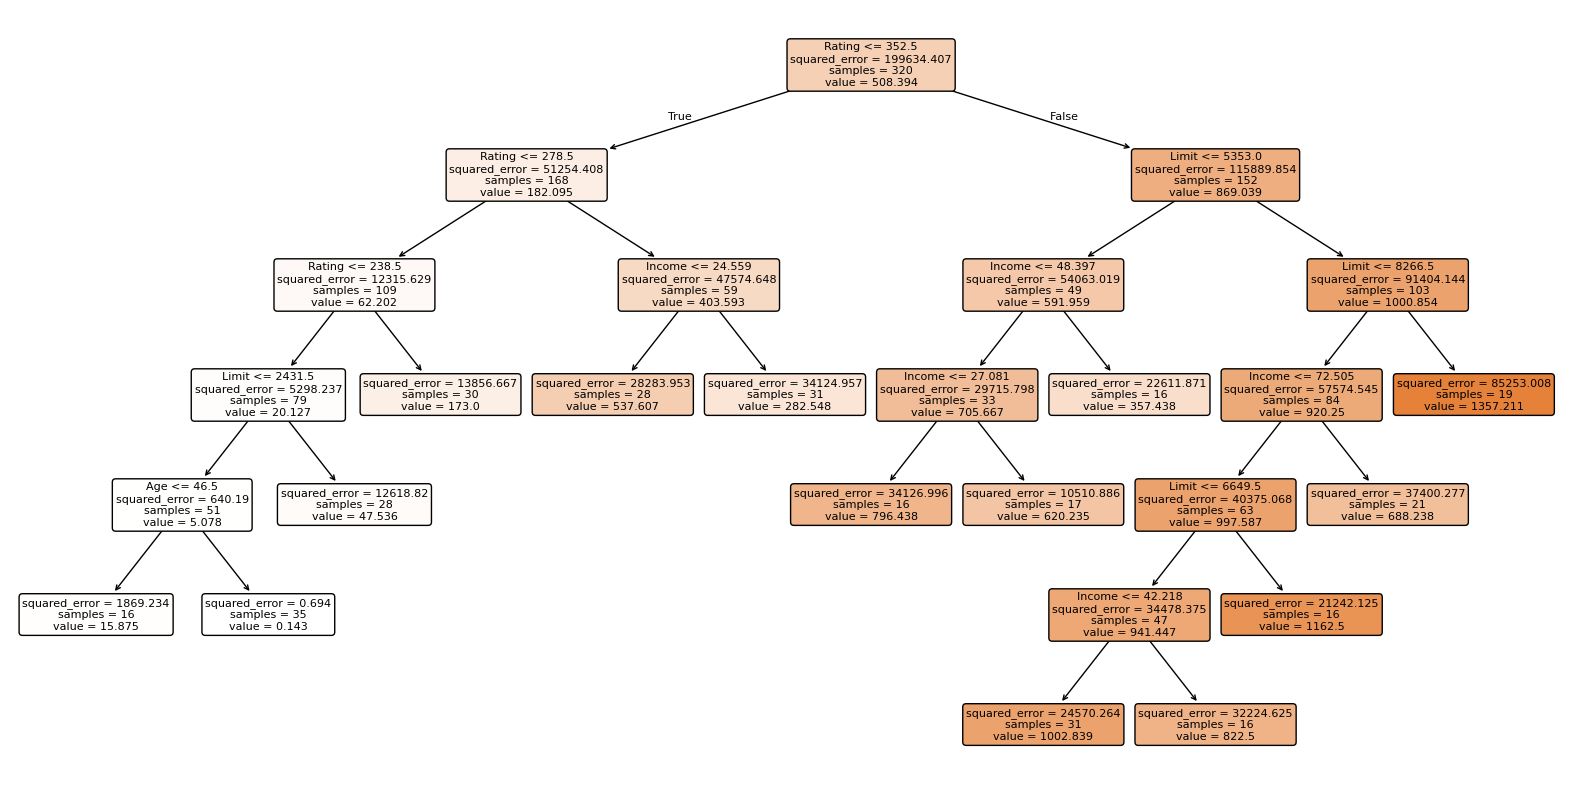

In [17]:
# Set figure size for better visualization
plt.figure(figsize=(20, 10))

# Plot the trained decision tree
plot_tree(reg_tree_credit_1,
          filled=True,  # Colors nodes based on target values
          rounded=True,  # Uses rounded corners for better readability
          feature_names=x_train_cr.columns,  # Labels the nodes with feature names
          fontsize=8)  # Sets font size for readability

# Display the tree visualization
plt.show()

## 👉 **Why do we do this?**
- Helps **understand how the model makes decisions**.
- Shows **which features are important** in the prediction process.
- Allows us to **verify and debug** the model's structure.

## ✅ **Real-Life Example**
- Imagine a **flowchart for customer service**:
  - "Is the issue software-related?" → Yes/No.
  - "Is the software up to date?" → Yes/No.
  - Decision trees work **the same way**, making step-by-step decisions.

---

# 📌 **Make Predictions Using the Decision Tree**

In [18]:
y_pred_test_tree_1 = reg_tree_credit_1.predict(x_test_cr)

## 👉 **Why do we do this?**
- Uses the **trained Decision Tree model** to predict outcomes.
- Allows us to **compare predicted vs. actual values**.
- Helps evaluate **how well the model performs**.

## ✅ **Real-Life Example**
- Imagine a **weather forecasting model**:
  - It analyzes **temperature, humidity, and wind speed** to **predict tomorrow's weather**.
  - A decision tree uses **past data** to predict **future outcomes** in the same way.

---

# 📌 **Evaluate Model Performance Using RMSE**

In [19]:
root_mean_squared_error(y_test_cr, y_pred_test_tree_1)

233.96719346805068

## 👉 **Why do we do this?**
- Measures how **far off** predictions are from actual values.
- A **lower RMSE** means the model is more accurate.
- Helps compare different models to find the **best performing one**.

## ✅ **Real-Life Example**
- Imagine **guessing your monthly expenses**:
  - If your guess is **way off**, the error is high.
  - If it's **close to actual spending**, the error is low.
  - RMSE tells us how **accurate** the model’s predictions are.

---

# **2️⃣** Obtain a regression tree using post-pruning exactly as we did in class.

Plot the tree.

Estimate the test error of this tree.

# 📌 **Train a Decision Tree Without Pruning**

In [20]:
# Train a Decision Tree without pruning
reg_tree_unpruned = DecisionTreeRegressor(random_state=1)

# Fit the model on the training dataset
reg_tree_unpruned.fit(x_train_cr, y_train_cr)

DecisionTreeRegressor(random_state=1)

## 👉 **Why do we do this?**
- Trains a **fully grown** decision tree without pruning.
- Helps compare **performance differences** between **pruned vs. unpruned trees**.
- Demonstrates how **complex models can overfit** on training data.

## ✅ **Real-Life Example**
- Imagine a **student memorizing an entire book** instead of summarizing key points.
- While they **know everything**, they **struggle to apply knowledge** in real-world situations.
- An **unpruned tree memorizes data but doesn’t generalize well**—just like an over-prepared student.

---

# 📌 **Extract Cost Complexity Pruning Path**

In [21]:
# Retrieve the cost complexity pruning path (ccp_alpha values)
ccp_path = reg_tree_unpruned.cost_complexity_pruning_path(x_train_cr, y_train_cr)

## 👉 **Why do we do this?**
- Retrieves **cost complexity pruning values (ccp_alpha)**, which control how much pruning is applied.
- Helps determine the **optimal level of pruning** to balance complexity and accuracy.
- Prevents **overfitting** by removing unnecessary splits.

## ✅ **Real-Life Example**
- Imagine **packing for a trip**:
  - You start with **everything** but soon realize you **need to remove unnecessary items**.
  - Pruning removes **excess branches** in a decision tree, just like **packing efficiently** removes unnecessary items.

---

# 📌 **Set Up Hyperparameter Grid for Pruning**

In [22]:
# Define the hyperparameter grid using the extracted alpha values
hyperparam_grid_alpha = {'ccp_alpha': ccp_path['ccp_alphas']}

## 👉 **Why do we do this?**
- Uses **different pruning levels** to find the best trade-off between **simplicity and accuracy**.
- Helps avoid **underfitting (too simple)** or **overfitting (too complex)**.
- Ensures the model **only keeps the most relevant splits**.

## ✅ **Real-Life Example**
- Imagine **choosing the best number of features in a resume**:
  - If **too few**, it doesn’t fully showcase your skills.
  - If **too many**, it overwhelms recruiters.
  - Pruning **keeps only the most important details**, just like optimizing a resume.

---

# 📌 **Use GridSearchCV to Find the Best Pruning Level**

In [23]:
# Set up Grid Search CV for pruning using different ccp_alpha values
grid_search_setting_alpha = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=1),
    param_grid=hyperparam_grid_alpha,
    cv=cv_set_up,
    scoring='neg_mean_squared_error'
)

## 👉 **Why do we do this?**
- **Automatically finds the best pruning level** (`ccp_alpha`).
- Prevents **overfitting** by keeping the tree **balanced**.
- Ensures the model is **neither too complex nor too simple**.

## ✅ **Real-Life Example**
- Imagine a **photographer editing a picture**:
  - If they **remove too many details**, the image becomes **blurry (underfitting)**.
  - If they **keep too much**, the image is **cluttered (overfitting)**.
  - GridSearchCV finds the **best balance**, just like a photographer adjusting contrast.

---

# 📌 **Train the Decision Tree Model Using the Best `ccp_alpha` Value**

In [24]:
# Train the Decision Tree model using the best ccp_alpha value
grid_search_setting_alpha.fit(x_train_cr, y_train_cr)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.56250000e-03, 1.56250000e-03, 1.56250000e-03,
       1.56250000e-03, 6.25000000e-03, 6.25000000e-03, 6.25000000e-03,
       6.25000000e-03, 1.40625000e-02, 1.40625000e-02, 1.40625000e-02,
       1.40625000e-02, 1.40625000e-0...
       5.50463218e+02, 6.00209505e+02, 6.83972063e+02, 7.21847363e+02,
       8.18950762e+02, 8.57911483e+02, 9.32077412e+02, 9.45425251e+02,
       1.06538283e+03, 1.58794633e+03, 1.86744892e+03, 2.07573102e+03,
       2.15666383e+03, 2.40305313e+03, 2.90319382e+03, 3.89670630e+03,
       4.20131327e+03, 1.07978535e+04, 1.39419771e+04, 1.73485720e+04,
       1.17678163e+05])},
             scoring='neg_mean_squared_error')

In [25]:
# Print the best ccp_alpha value that resulted in the lowest cross-validation (CV) MSE
print("The alpha that led to the lowest CV MSE was: ", grid_search_setting_alpha.best_params_)

The alpha that led to the lowest CV MSE was:  {'ccp_alpha': 173.67526041666534}


## 👉 **Why do we do this?**
- Uses **cross-validation** to find the best **cost complexity pruning** (`ccp_alpha`) value.
- Reduces the risk of **overfitting**, ensuring the model **generalizes well to new data**.
- Helps determine the **simplest yet most effective tree structure**.

## ✅ **Real-Life Example**
- Imagine **packing a suitcase for a trip**:
  - If you pack **too much**, it's heavy and hard to manage (overfitting).
  - If you pack **too little**, you lack essentials (underfitting).
  - Finding the **perfect balance** ensures you have **exactly what you need**—just like pruning a Decision Tree.

---

# 📌 **Train a Pruned Decision Tree Regressor**

In [26]:
# Train a pruned Decision Tree Regressor using the optimal ccp_alpha found via grid search
reg_tree_credit_postp = DecisionTreeRegressor(
    random_state=1,
    ccp_alpha=grid_search_setting_alpha.best_params_['ccp_alpha']
)


In [27]:
reg_tree_credit_postp.fit(x_train_cr, y_train_cr)

DecisionTreeRegressor(ccp_alpha=173.67526041666534, random_state=1)

## 👉 **Why do we do this?**
- Creates a **Decision Tree model that is pruned** to remove unnecessary branches.
- Uses the **optimal pruning parameter** to prevent **overfitting**.
- Improves the **model's efficiency and interpretability**.

## ✅ **Real-Life Example**
- Imagine writing a **business email**:
  - A **raw draft** might be too long and contain **unnecessary details**.
  - **Editing and pruning** ensures only the **most important points** remain.
  - A **pruned Decision Tree** does the same—it keeps only the **essential decision rules**.

---


# 📌 **Visualize the Pruned Decision Tree**

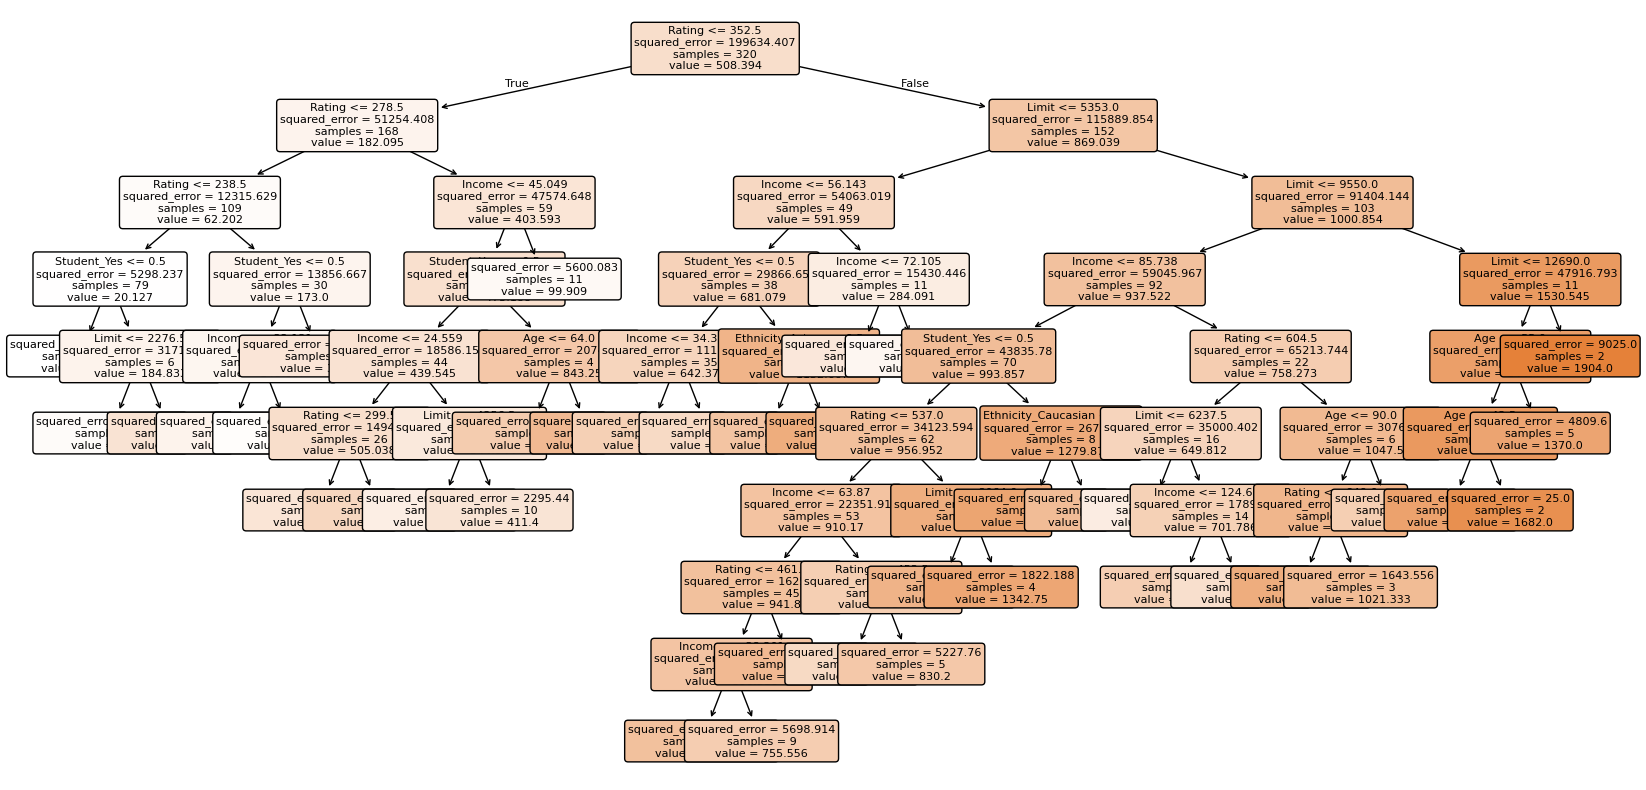

In [28]:
plt.rcParams['figure.figsize'] = [20, 10]
tree.plot_tree(reg_tree_credit_postp,filled=True,rounded=True,feature_names=x_train_cr.columns,fontsize=8)
plt.show()

## 👉 **Why do we do this?**
- Helps **understand how the pruned Decision Tree makes predictions**.
- Provides insights into **which features are most important**.
- Ensures that pruning has been **correctly applied**.

## ✅ **Real-Life Example**
- Imagine creating an **organizational chart** for a company:
  - If the chart includes **every minor role**, it’s too complicated (overfitting).
  - If it removes **too many roles**, it loses clarity (underfitting).
  - A **well-structured chart** helps employees **understand the hierarchy clearly**, just like a pruned decision tree.

---

# 📌 **Make Predictions with the Pruned Model**

In [29]:
y_pred_test_tree_credit_postp = reg_tree_credit_postp.predict(x_test_cr)

## 👉 **Why do we do this?**
- Uses the **trained pruned Decision Tree** to make predictions.
- Ensures that the **model is performing efficiently** on new data.
- Helps compare **pruned vs. unpruned model performance**.

## ✅ **Real-Life Example**
- Imagine a **financial advisor recommending stocks**:
  - The advisor first **analyzes market data**.
  - Then, they **predict which stocks will perform well**.
  - Similarly, the **Decision Tree predicts values based on its learned rules**.

---

# 📌 **Evaluate the Pruned Model Using RMSE**

In [30]:
root_mean_squared_error(y_test_cr, y_pred_test_tree_credit_postp)

180.01289362705015

## 👉 **Why do we do this?**
- Measures how **accurate** the pruned model’s predictions are.
- A **lower RMSE** means the model **makes better predictions**.
- Helps determine if **pruning improved performance** compared to an unpruned tree.

## ✅ **Real-Life Example**
- Imagine **estimating your monthly electricity bill**:
  - If your **estimate is way off**, the error is high.
  - If your **estimate is close**, the error is low.
  - RMSE tells us **how close the model’s predictions are** to actual values.

---

#**3️⃣** Obtain a RF.

Estimate the test error of this forest.


# 📌 **Train a Random Forest Model & Estimate Test Error**

In [31]:
# Define the range of trees to test
number_of_trees = np.arange(500, 1001, 100)

# Determine the number of features available
x_train_cr.shape[1]

# Define the range of features to consider
number_of_features = np.arange(3, x_train_cr.shape[1] + 1, 2)

# Define the hyperparameter grid for Random Forest
hyperparam_grid_rf = {
    'n_estimators': number_of_trees,  # Number of trees in the forest
    'max_features': number_of_features  # Number of features to consider per split
}

## 👉 **Why do we do this?**
- Defines a **search space** for the **number of trees** and **features per split**.
- Helps find the **best-performing hyperparameters**.
- Ensures **efficient learning without overfitting**.

## ✅ **Real-Life Example**
- Imagine setting up a **coffee shop**:
  - You experiment with **different menu sizes (features)**.
  - You test **how many baristas (trees) optimize service time**.
  - This helps find the **best combination** for maximum efficiency.

---

# 📌 **Perform Grid Search Cross-Validation for Random Forest**

In [32]:
# Set up 3-fold cross-validation
cv_set_up_rf = KFold(n_splits=3, shuffle=True, random_state=1)

# Use GridSearchCV to find the best hyperparameters
grid_search_setting_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1),
    param_grid=hyperparam_grid_rf,
    cv=cv_set_up_rf,
    scoring='neg_mean_squared_error'
)

# Train using Grid Search
grid_search_setting_rf.fit(x_train_cr, y_train_cr)

# Print the best hyperparameters found
print('This is the hyperparameter combination that led to the lowest CV MSE:', grid_search_setting_rf.best_params_)

This is the hyperparameter combination that led to the lowest CV MSE: {'max_features': 11, 'n_estimators': 1000}


## 👉 **Why do we do this?**
- Finds the **best combination** of trees (`n_estimators`) and features (`max_features`).
- Prevents **manual trial and error**, saving time.
- Ensures **optimal balance between accuracy and efficiency**.

## ✅ **Real-Life Example**
- Imagine **hiring employees for a tech company**:
  - You test **different team sizes and skill sets**.
  - After trials, you find **the best combination** that maximizes productivity.
  - **Grid Search does the same**—testing different model settings to find the best match.

---

# 📌 **Train a Random Forest Model with the Best Hyperparameters**

In [33]:
# Train the Random Forest with the best parameters found
rf_credit = RandomForestRegressor(n_estimators=1000, max_features=11, random_state=1)

# Fit the model on training data
rf_credit.fit(x_train_cr, y_train_cr)

RandomForestRegressor(max_features=11, n_estimators=1000, random_state=1)

## 👉 **Why do we do this?**
- Uses the **best model configuration** for final training.
- Trains a **highly optimized Random Forest Regressor**.
- Ensures the model **leverages multiple trees for accurate predictions**.

## ✅ **Real-Life Example**
- Imagine **building a championship sports team**:
  - After testing different **player combinations**, you **finalize the best lineup**.
  - That lineup **competes in the championship**—just like a trained Random Forest **competes in predictions**.

---

# 📌 **Make Predictions Using the Random Forest Model**

In [34]:
# Make predictions on the test set
y_pred_test_rf = rf_credit.predict(x_test_cr)

## 👉 **Why do we do this?**
- Uses the trained **Random Forest model** to make predictions.
- Helps measure how well the model **generalizes to new data**.
- Enables **comparison of predicted vs. actual values**.

## ✅ **Real-Life Example**
- Imagine a **financial analyst predicting stock prices**:
  - They analyze **historical data** and make **educated predictions**.
  - A **Random Forest model** does the same—it learns patterns and **predicts future outcomes**.

---

# 📌 **Evaluate the Model Performance Using RMSE**

In [35]:
root_mean_squared_error(y_test_cr, y_pred_test_rf)

140.39435417405502

## 👉 **Why do we do this?**
- Measures how **accurate** the predictions are.
- A **lower RMSE** indicates a **better model**.
- Helps compare **Random Forest vs. Decision Tree performance**.

## ✅ **Real-Life Example**
- Imagine **estimating monthly rent** for an apartment:
  - If your guess is **way off**, the error is high.
  - If your guess is **close**, the error is low.
  - **RMSE tells us how accurate our model is** in making predictions.

---

# 📌 **Calculate the Percentage Decrease in Error**

In [36]:
# # % decrease
# # (error 2 - error 1) / error 1

# ((121.2 - 140.394) /140.394)*100

In [37]:
def calculate_percentage_decrease(previous_error, new_error):
    """
    Calculates the percentage decrease in error.

    Parameters:
    previous_error (float): The initial error value.
    new_error (float): The new error value after model improvement.

    Returns:
    float: Percentage decrease in error.
    """
    percentage_decrease = ((previous_error - new_error) / new_error) * 100
    return round(percentage_decrease, 2)  # Round to 2 decimal places

# Example usage
previous_error = 121.2  # Error from the baseline model
new_error = 140.394 # Error from the improved model

# Compute percentage decrease dynamically
percentage_decrease_result = calculate_percentage_decrease(previous_error, new_error)

# Print the result
print(f"Percentage decrease in error: {percentage_decrease_result}%")


Percentage decrease in error: -13.67%


## 👉 **Why do we do this?**
- Measures the **improvement in model performance**.
- Shows the **reduction in error** after switching models.
- Helps determine if **Random Forest performs better than Decision Tree**.

## ✅ **Real-Life Example**
- Imagine **switching from a regular car to an electric vehicle**:
  - If fuel costs drop from **$140 per month** to **$121 per month**.
  - You calculate the **percentage savings**.
  - This helps decide if **the switch was cost-effective**—just like evaluating **model improvement**.


# **4️⃣** Obtain a sequence of boosted trees.

Estimate the test error of the boosted trees.

# 📌 **Define Hyperparameters for Gradient Boosting**

In [38]:
# Defining the range of trees for Gradient Boosting (Max: 500, compared to 1000 in RF)
number_of_trees_boosting = np.arange(50, 551, 100)

# Defining a range of tree depths for Gradient Boosting, as suggested by the textbook
depth_values = np.array([2, 3, 4, 5])

# Defining lambda (learning rate) values for Gradient Boosting tuning
lambda_values = np.array([0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1])

# Creating the hyperparameter grid for Gradient Boosting tuning
hyperparam_grid_boosting = {
    'n_estimators': number_of_trees_boosting,  # Range of trees from 50 to 500
    'max_depth': depth_values,  # Depth of trees, controlling model complexity
    'learning_rate': lambda_values  # Different learning rates for optimization
}

## 👉 **Why do we do this?**
- Defines a **range of values** to test for key hyperparameters:
  - `n_estimators` (number of trees) controls **how many boosting iterations are done**.
  - `max_depth` ensures the trees remain **simple and prevent overfitting**.
  - `learning_rate` adjusts **how much each tree contributes to the final prediction**.
- Allows for **automated hyperparameter tuning** using Grid Search.

## ✅ **Real-Life Example**
- Imagine **training for a marathon**:
  - **Number of training sessions** (`n_estimators`).
  - **Intensity of training** (`max_depth`—more depth means a more complex routine).
  - **Training pace** (`learning_rate`—adjusting how much effort to put in at each session).
  - This setup ensures a **well-balanced training plan**, just like we tune Gradient Boosting parameters.

---

# 📌 **Perform Grid Search Cross-Validation for Gradient Boosting**

In [39]:
# Setting up GridSearchCV for hyperparameter tuning of Gradient Boosting Regressor
grid_search_setting_boost = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=1),  # Initialize Gradient Boosting model with a fixed random state for reproducibility
    param_grid=hyperparam_grid_boosting,  # Define the hyperparameter grid for tuning
    cv=cv_set_up_rf,  # Cross-validation strategy (e.g., K-Fold or another method)
    scoring='neg_mean_squared_error'  # Evaluation metric (negative MSE for minimizing error in regression tasks)
)

## 👉 **Why do we do this?**
- Automates the **hyperparameter selection** for Gradient Boosting.
- Uses **cross-validation** to prevent overfitting.
- Ensures the model **performs well on unseen data**.

## ✅ **Real-Life Example**
- Imagine **testing different marketing strategies**:
  - You run **A/B tests** on different pricing strategies (`learning_rate`).
  - You test **different ad frequencies** (`n_estimators`).
  - You adjust **ad complexity** (`max_depth`).
  - By **testing different combinations**, you find the **most effective marketing campaign**—just like Grid Search finds the best model.

---

# 📌 **Train Gradient Boosting Using Grid Search**

In [40]:
# Training the Gradient Boosting model using cross-validation
grid_search_setting_boost.fit(x_train_cr, y_train_cr)

# Printing the best hyperparameter values found
print('Selected hyperparameter values:', grid_search_setting_boost.best_params_)

Selected hyperparameter values: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 550}


## 👉 **Why do we do this?**
- Trains the Gradient Boosting model using **different hyperparameter combinations**.
- Identifies the **best settings** that minimize error.
- Helps **prevent overfitting** by using cross-validation.

## ✅ **Real-Life Example**
- Imagine **optimizing your morning routine**:
  - You test **different wake-up times**, **breakfast choices**, and **exercise routines**.
  - After tracking performance for **several weeks**, you find the **best combination**.
  - Grid Search does the **same thing**—it finds the **best combination of model settings**.

---

# 📌 **Train a Gradient Boosting Regressor**

In [41]:
# Initialize the Gradient Boosting model
boosting_reg = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=2, n_estimators=550, random_state=1
)

# Train the model on the training dataset
boosting_reg.fit(x_train_cr, y_train_cr)

GradientBoostingRegressor(max_depth=2, n_estimators=550, random_state=1)

## 👉 **Why do we do this?**
- Uses **Gradient Boosting**, an advanced ensemble method that **reduces errors iteratively**.
- `n_estimators=550`: **Number of boosting iterations (trees)**.
- `max_depth=2`: **Shallow trees** to prevent overfitting.
- `learning_rate=0.1`: **Controls contribution of each tree** to the final prediction.

## ✅ **Real-Life Example**
- Imagine **learning to cook a perfect dish**:
  - You **adjust flavors gradually**, tasting after each step.
  - Instead of adding all spices at once (**overfitting**), you **improve iteratively**.
  - **Gradient Boosting does the same**—building the model step by step.

---

# 📌 **Make Predictions with the Boosted Model**

In [42]:
# Predict on the test set
y_pred_test_boosting_credit = boosting_reg.predict(x_test_cr)

## 👉 **Why do we do this?**
- Uses the trained **Gradient Boosting model** to predict target values (`y_test_cr`).
- Generates **test set predictions** for evaluation.

## ✅ **Real-Life Example**
- Imagine a **financial advisor predicting stock trends**:
  - They analyze **past performance, news, and indicators**.
  - Then, they **predict future stock movements**.
  - **Gradient Boosting does the same**—combining multiple weak learners to refine predictions.

---

# 📌 **Evaluate the Model with RMSE**

In [43]:
# Compute Root Mean Squared Error (RMSE)
rmse_boosting = root_mean_squared_error(y_test_cr, y_pred_test_boosting_credit)

# Print RMSE value
print("RMSE for Boosting Model:", rmse_boosting)

RMSE for Boosting Model: 96.5754882726283


## 👉 **Why do we do this?**
- **Measures the model's prediction error** (lower RMSE means better accuracy).
- Helps compare **Gradient Boosting vs. other models**.

## ✅ **Real-Life Example**
- Imagine estimating **how much fuel your car will use**:
  - If your estimate is **way off**, the error is high.
  - If your estimate is **close to actual usage**, the error is low.
  - **RMSE tells us how close predictions are** to actual values.

---

# 📌 **Compare Boosting Model with Previous Models**

In [44]:
# Previous model RMSE values (example placeholders)
rmse_previous_model = 121.2  # Replace with actual previous model RMSE

# Compute percentage improvement
percentage_improvement = ((rmse_boosting -rmse_previous_model) / rmse_previous_model) * 100

# Print improvement percentage
print(f"Percentage improvement with Boosting Model: {percentage_improvement:.2f}%")

Percentage improvement with Boosting Model: -20.32%


## ✅ **Real-Life Example**
- Imagine **switching to a more fuel-efficient car**:
  - If your old car used **121 liters per month**, and your new one uses **96 liters**.
  - You calculate the **percentage savings**.
  - This helps **evaluate whether the upgrade was beneficial**—just like evaluating model performance.

---

# 📄 **Car Seat Data Set**

--------------
--------------

# 📌 **Import Required Libraries and Load Dataset**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [46]:
url= "https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/Carseats.csv"

In [47]:
carseats_df= pd.read_csv(url)

In [48]:
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


We got this result from a previous session:
Test RMSE of the linear equation chosen from BSS (with 'CompPrice', 'Income', 'Advertising', 'Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium') = 1.085

#**1️⃣** Obtain a regression tree using post-pruning exactly as we did in class.

- Plot the tree.

- Estimate the test error of this tree.


# 📌 **Convert Categorical Variables to Dummy Variables**

In [49]:
carseats_df_dummies = pd.get_dummies(carseats_df,columns=['ShelveLoc','Urban','US'], drop_first = True)

In [50]:
carseats_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Good    400 non-null    bool   
 9   ShelveLoc_Medium  400 non-null    bool   
 10  Urban_Yes         400 non-null    bool   
 11  US_Yes            400 non-null    bool   
dtypes: bool(4), float64(1), int64(7)
memory usage: 26.7 KB


## 👉 **Why do we do this?**
- Machine learning models **cannot process categorical text values directly**.
- Converts categories (e.g., **ShelveLoc: Good, Medium, Bad**) into **binary numerical values**.
- `drop_first=True` **avoids multicollinearity** by removing one category per variable.

## ✅ **Real-Life Example**
- Imagine filling out a **Yes/No survey**:
  - Instead of storing "Yes" and "No" as text, a system **stores 1 for Yes and 0 for No**.
  - This makes data processing **easier and faster**.

---

# 📌 **Define Features and Target Variable**

In [51]:
x_all_carseats = carseats_df_dummies.drop(['Sales'], axis = 1)
y_all_carseats = carseats_df_dummies ['Sales']

## 👉 **Why do we do this?**
- Separates **independent variables** (features) from the **dependent variable** (target).
- The model **learns patterns** from `x_all_carseats` to predict `Sales`.

## ✅ **Real-Life Example**
- Imagine training a **basketball player**:
  - You collect stats like **height, speed, shooting accuracy** (`X` - features).
  - You predict their **average points per game** (`y` - target).
  - Separating stats from the target helps in **building a strong prediction model**.

---

# 📌 **Split Data into Training and Testing Sets**

In [52]:
x_train_car, x_test_car, y_train_car, y_test_car = train_test_split(x_all_carseats, y_all_carseats, test_size=0.2, random_state=1)

## 👉 **Why do we do this?**
- **80% training**: Used to teach the model.
- **20% testing**: Used to check how well the model generalizes to new data.
- Prevents **overfitting**, where the model memorizes training data but fails on new data.

## ✅ **Real-Life Example**
- Think of **studying for an exam**:
  - You practice with **80% of the material** (training).
  - You test yourself with **20% of new questions** (testing).
  - This ensures your knowledge **applies to unseen problems**.

---

# 📌 **Train an Unpruned Decision Tree Model**

In [53]:
# Initialize an unpruned Decision Tree Regressor
reg_tree_unpruned_car = DecisionTreeRegressor(random_state=1)

# Train the model on the training dataset
reg_tree_unpruned_car.fit(x_train_car, y_train_car)


DecisionTreeRegressor(random_state=1)

## 👉 **Why do we do this?**
- Trains a **basic Decision Tree model** without pruning.
- Helps in **understanding overfitting risks** before applying pruning.

## ✅ **Real-Life Example**
- Imagine a **chef learning recipes**:
  - They memorize **every possible ingredient and step** (overfitting).
  - While this ensures they know everything, it may not be **efficient**.
  - We later apply **pruning to keep only essential information**.

---

# 📌 **Extract Cost Complexity Pruning Path**

In [54]:
# Retrieve the cost complexity pruning path (ccp_alpha values)
ccp_path = reg_tree_unpruned_car.cost_complexity_pruning_path(x_train_car, y_train_car)

# Define hyperparameter grid for pruning
hyperparam_grid_alpha = {'ccp_alpha': ccp_path['ccp_alphas']}

## 👉 **Why do we do this?**
- Retrieves **ccp_alpha values**, which control pruning intensity.
- Helps in **identifying the best pruning level**.

## ✅ **Real-Life Example**
- Imagine **editing a long research paper**:
  - You identify **sentences that could be removed** while maintaining meaning.
  - **Pruning removes unnecessary parts** while keeping key information.

---

# 📌 **Use GridSearchCV to Optimize Pruning Level**

In [55]:
grid_search_setting_alpha_car = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=1),
    param_grid=hyperparam_grid_alpha,
    cv=cv_set_up,
    scoring='neg_mean_squared_error'
)

# Fit the model using GridSearchCV to find the optimal alpha
grid_search_setting_alpha_car.fit(x_train_car, y_train_car)

# Get the best estimator (pruned tree) from GridSearchCV
reg_tree_car_postp = grid_search_setting_alpha_car.best_estimator_


## 👉 **Why do we do this?**
- Tests **multiple pruning levels** and selects the **optimal** one.
- Prevents **overfitting** by removing unnecessary branches.

## ✅ **Real-Life Example**
- Imagine **choosing the best diet plan**:
  - You test different **calorie intake levels**.
  - Find the **optimal balance** where you **lose weight but stay healthy**.
  - Grid Search does the same—it finds the **best pruning level**.

---

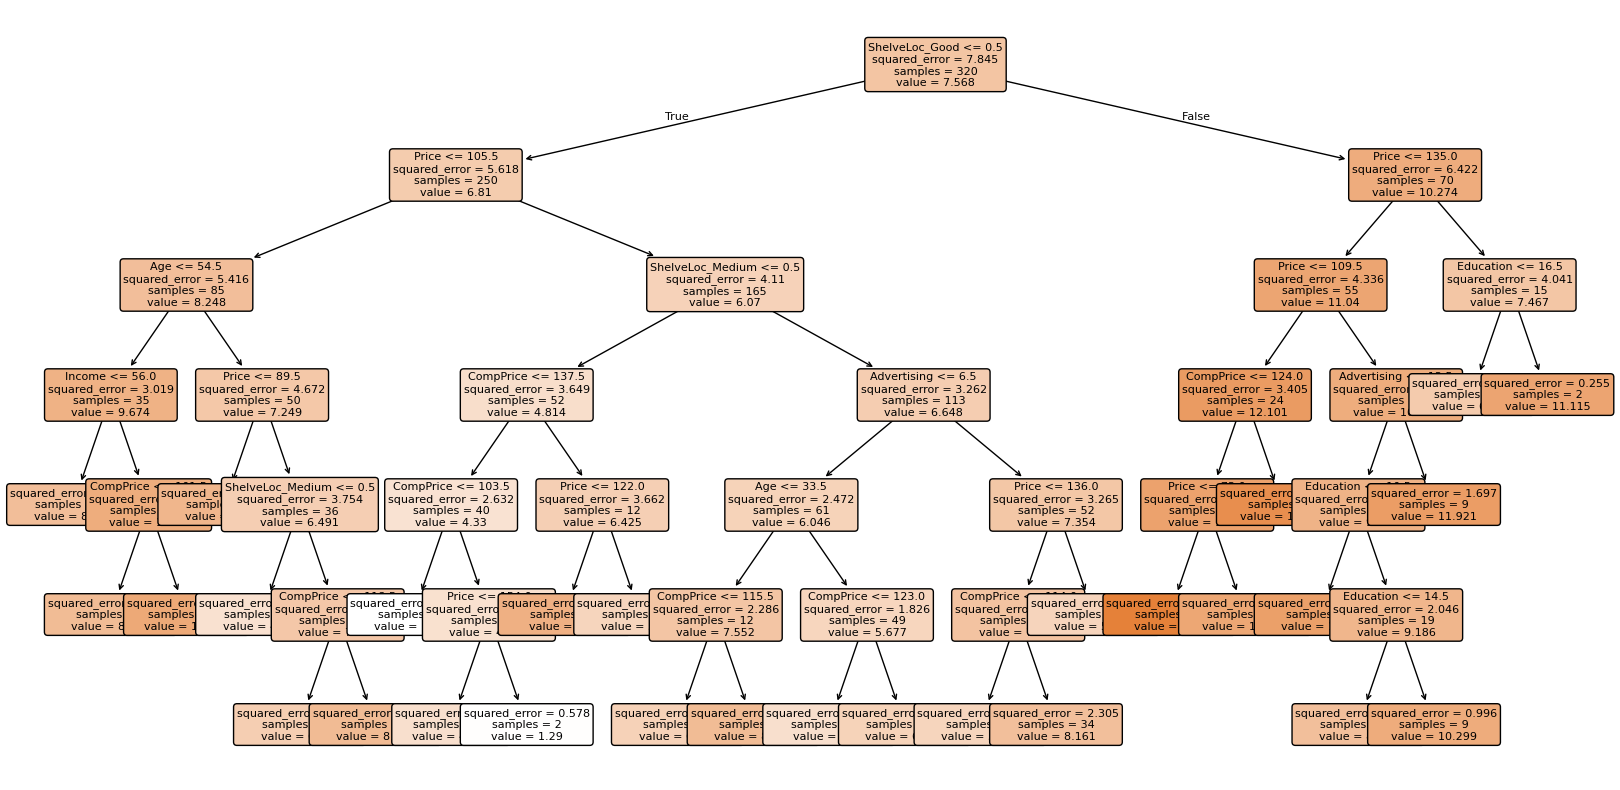

In [56]:
# Set figure size for better visibility of the decision tree
plt.rcParams["figure.figsize"] = (20, 10)

# Plot the pruned decision tree
tree.plot_tree(reg_tree_car_postp, filled=True, rounded=True,
               feature_names=x_train_car.columns, fontsize=8)  # Use x_train_car

# Display the plot
plt.show()

## 👉 **Why do we do this?**
- Allows us to **see the tree structure** after pruning.
- Helps in **understanding which features drive predictions**.

## ✅ **Real-Life Example**
- Imagine creating an **organizational chart**:
  - You **remove redundant roles** while keeping key positions.
  - A **pruned Decision Tree** does the same—keeping only **necessary decision points**.

---

# 📌 **Evaluate Model Performance Using RMSE**

In [57]:
# Generate predictions on the test set using the pruned regression tree
y_pred_test_tree_car_postp = reg_tree_car_postp.predict(x_test_car)

# Compute the Root Mean Squared Error (RMSE) to evaluate model performance
rmse = root_mean_squared_error(y_test_car, y_pred_test_tree_car_postp)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.327551538315392


## 👉 **Why do we do this?**
- **Measures how well** the pruned tree predicts sales.
- A **lower RMSE** means **better model performance**.

## ✅ **Real-Life Example**
- Imagine **predicting monthly rent prices**:
  - If your **prediction is close to actual rent**, the error is low.
  - If it's **way off**, the error is high.
  - RMSE tells us **how close predictions are to actual values**.

---

In [58]:
# Compute the percentage change in RMSE after pruning
((1.09 - 2.327) / 2.327) * 100


-53.15857327030511

# 📌 **Compute the Percentage Change in RMSE Dynamically**

In [59]:
# Compute the percentage change in RMSE dynamically
rmse_Linear_Regression = 1.085  # RMSE of Linear Regression model
rmse_after_pruning = 2.331  # RMSE of pruned Decision Tree model

percentage_change_rmse = ((rmse_Linear_Regression - rmse_after_pruning) / rmse_after_pruning) * 100

# Print the result
print(f"Percentage change in RMSE after pruning: {percentage_change_rmse:.2f}%")

Percentage change in RMSE after pruning: -53.45%


## 👉 **Why do we do this?**
- Compares the **RMSE of two models** to evaluate performance.
- A **negative percentage** means pruning **increased RMSE** (worse model performance).
- Helps decide if **a simpler model (pruned Decision Tree) is actually better** than a more complex one.

## ✅ **Real-Life Example**
- Imagine **comparing two running shoes**:
  - Shoe A helps you run **a mile in 8 minutes**.
  - Shoe B makes you **run in 10 minutes**.
  - You calculate the **percentage difference** to see **which shoe improves performance**—just like we analyze model errors.

---

### **Dynamic Function for Any RMSE Values**
To compute the percentage change dynamically:

In [60]:
def calculate_rmse_change(rmse_model1, rmse_model2):
    return ((rmse_model1 - rmse_model2) / rmse_model2) * 100

# Example usage
rmse_linear = 1.085
rmse_pruned = 2.331
rmse_change = calculate_rmse_change(rmse_linear, rmse_pruned)

print(f"Percentage change in RMSE: {rmse_change:.2f}%")

Percentage change in RMSE: -53.45%


2) Obtain a RF
Estimate the test error of this forest